Let's see how far we might be able to push the sky brightness into twilight

In [1]:
%matplotlib inline
import numpy as np
import lsst.sims.skybrightness as sb
import matplotlib.pylab as plt

In [2]:
# Let's look at just the twilight component
sm = sb.SkyModel(mags=True, lowerAtm=False, upperAtm=False, airglow=False, scatteredStar=False,
                 mergedSpec=False, zodiacal=False, moon=False, twilight=True)

In [3]:
mjd0 = 49353.177645-.1+30
mjds = np.arange(mjd0, mjd0+0.5, .002)

In [4]:
mags = []
sunAlts = []
for mjd in mjds:
    # Point at Zenith
    sm.setRaDecMjd(np.array([0.]), np.array([90.]), mjd, degrees=True, azAlt=True)
    mags.append(sm.returnMags()['g'])
    sunAlts.append(sm.sunAlt)
    

/Users/yoachim/gitRepos/sims_skybrightness/python/lsst/sims/skybrightness/skyModel.py:665: RuntimeWarning: divide by zero encountered in log10
  mags = -2.5*np.log10(self.spec)+np.log10(3631.)


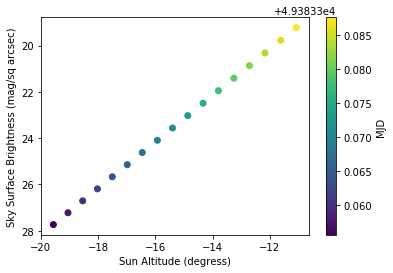

In [5]:
plt.scatter(np.degrees(sunAlts), mags, c=mjds)
cb = plt.colorbar()
plt.xlabel('Sun Altitude (degress)')
plt.ylabel('Sky Surface Brightness (mag/sq arcsec)')
cb.set_label('MJD')
# Always flip mags
plt.gca().invert_yaxis()